In [1]:
# load all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
# load the data
df= pd.read_csv('titanicdata.csv')

In [6]:
# check for the header data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# The shape of dataset
df.shape

(891, 12)

In [5]:
# Understanding the numerical datas and their mean, median , max , min..... etc
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# count of individual columns
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [9]:
# check for the null values in the datas according to individual columns
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

From above , It can be seen that Age and Cabin columns have large no of null values.

<AxesSubplot:>

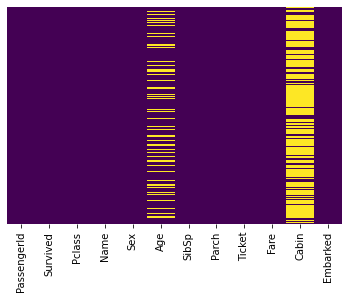

In [21]:
# making the heatmap of null values in dataset
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [22]:
# value count of survived columns
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [23]:
# value count of sex columns

df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [107]:
# get all other numerical data's sum according to the types of values in sex column
df.groupby('Sex').sum()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,135343,233,678,7286.00,218,204,13966.6628
male,262043,109,1379,13919.17,248,136,14727.2865


<AxesSubplot:xlabel='Survived', ylabel='count'>

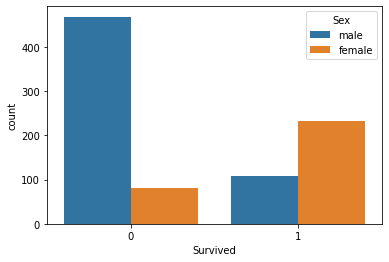

In [38]:
# countplot of data based on survived or not, in accordance with sex
sns.countplot(x="Survived",hue='Sex',data=df)

from above figure it can be seen that male survived more than other females in considerable fraction.


<AxesSubplot:xlabel='Survived', ylabel='count'>

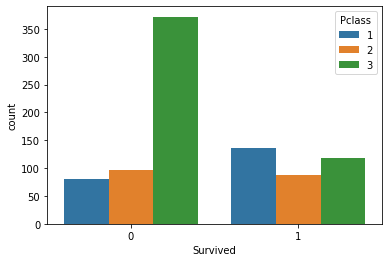

In [41]:
# countplot of data based on survived or not, in accordance with Passenger class

sns.countplot(x="Survived",hue='Pclass',data=df)

from above figure it can be seen that passenger from class 3 survived more than other class.

/home/sujan/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

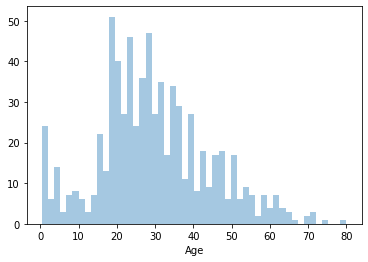

In [48]:
# making the distplot of age with removed null values
sns.distplot(df["Age"].dropna(),bins=50,kde=False)

From above figure it can be seen that people of maximum age group 20 to 35 are present in titanic.

<AxesSubplot:>

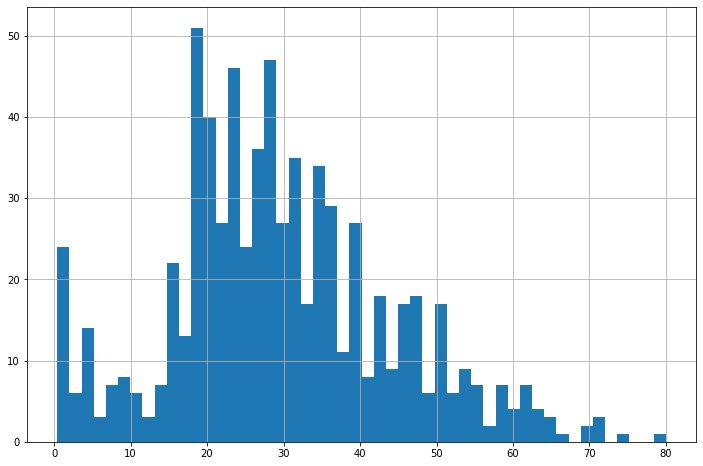

In [55]:
# similar way, making the histplot of age again
df['Age'].hist(bins=50,figsize=(12,8))

<AxesSubplot:xlabel='SibSp', ylabel='count'>

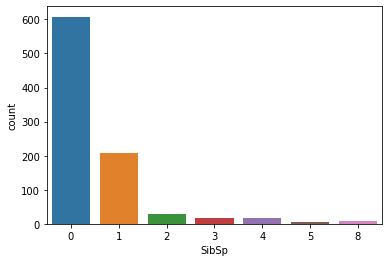

In [59]:
# countplot of SibSp 
sns.countplot(x="SibSp",data=df)

<AxesSubplot:>

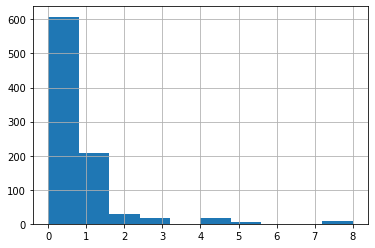

In [62]:
# hist plot of sibsp again
df['SibSp'].hist()

# Data cleaning

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

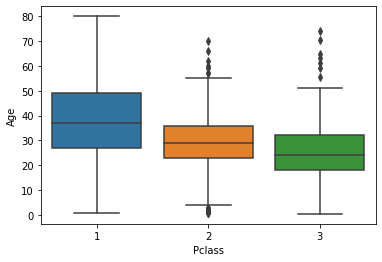

In [63]:
# first lets check the age class have some relation with other class or not

sns.boxplot(x="Pclass",y="Age",data=df)

In [72]:
# since we can clearly see their is relation between age and pessenger class thus we will input the missing value is the age column with average value of rach pclass according to age
def input_age(cols):
    Age =cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass ==1:
            return 37
        elif Pclass ==1:
            return 28
        else :
            return 24
    else :
        return Age
    
df['Age']=df[['Age','Pclass']].apply(input_age,axis=1)
    

<AxesSubplot:>

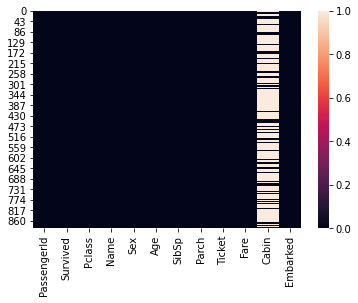

In [74]:
sns.heatmap(df.isnull())

In [76]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [77]:
# since there is so many nan value in cabin columns so we are going to delete that colums
df.drop('Cabin',axis=1,inplace=True)

In [87]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [97]:
SEX=pd.get_dummies(df['Sex'],drop_first=True)
df.drop(['Sex','Name',"Ticket","Embarked"],axis=1,inplace=True)

In [98]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [99]:
FinalData= pd.concat([df,SEX],axis=1)

In [101]:
FinalData.head(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,1,0,3,22.0,1,0,7.2500,1
1,2,1,1,38.0,1,0,71.2833,0
2,3,1,3,26.0,0,0,7.9250,0


In [103]:
FinalData["Age"].mean()

29.004680134680132